# Hierarchical Clustering

* By Wai Ping Jerry KWOK
* Created on 2023-09-12

**Objective:**

To segment customers into groups for a targeted marketing strategy.

**Problem Statement:**

The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.


# 1. Data

In [1]:
# import libraries for use
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt
from kneed import KneeLocator

# import sklearn for use
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# import scipy for use
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

**a. Load *CC General.csv* into a pandas dataframe. Print out the header. Use *pandas.DataFrame.describe* to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.**

In [2]:
# load the entire csv files as DataFrame using Pandas
df = pd.read_csv('CC General.csv', delimiter=',')

In [3]:
# print out the header
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# summarize the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


** Observations:**
* There are 8,950 entries in the dataset with 18 variables.

* Data descriptions
1. CUST_ID : Identification of the credit card holder
2. BALANCE : Balance amount left in their account to make purchases (numeric)
3. BALANCE_FREQUENCY : How frequent the balance is updated, value between 0 and 1 (binary, 1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account (numeric)
5. ONEOFF_PURCHASES : Maximum purchase amount done in one purchase (one-go) (numeric)
6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment (numeric)
7. CASH_ADVANCE : Cash in advance given by the user (numeric)
8. PURCHASES_FREQUENCY : How frequent purchases are being made, score between 0 and 1 (binary, 1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY : How frequent purchases are happening in one-go (binary, 1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY : How frequent purchases in installments are being done (binary, 1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY : How frequent the cash in advance is being paid (numeric)
12. CASH_ADVANCE_TRX : Number of transactions made with 'Cash in Advanced' (numeric)
13. PURCHASES_TRX : Number of purchase transactions made (numeric)
14. CREDIT_LIMIT : credit limit of credit card for user (numeric)
15. PAYMENTS : Amount of payment done by user (numeric)
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user (numeric)
17. PRC_FULL_PAYMENT : Percent of full payment paid by user (numeric)
18. TENURE : Tenure of credit card service for user (numeric)

* CUST_ID is for identification of a customer, we should drop this information before analysis.
* For BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, we should investigate further the definition of 0 (not frequently updated) and 1 (frequently updated). We should know 'how many times' would be deemed as frequent and vice versa.
* For CASH_ADVANCE_FREQUENCY, we should investigate the definition of calculation behind this numerical value. It does not behave like other frequency feature that comes only with 0 and 1.
* We should understand the definition of BALANCE, CASH_ADVANCE from the business unit. The data description is not clear for the context.
* The features are in different range. We should apply scaler before fitting into model.

**b. Use *pandas.DataFrame.info* to check if the entries are the correct datatype, and if there are any missing values. Use *pandas.DataFrame.duplicates* to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.**

In [5]:
# display the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# check for duplicated values
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

**Obeservations**
1. All the data are numerical data except CUST_ID.
2. There is no duplicated rows.
3. There are 313 entries in MINIMUM_PAYMENTS and 1 entry in CREDIT_LIMIT with missing values. We fill in the missing values with the average from the features using .fillna() and .mean()

In [8]:
# fill the missing values with mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [9]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

The missing values are fixed. There are no missing values, duplicate rows, or incorrect data types in the data set.

**c. Drop the 'CUST_ID' column. Use *seaborn.heatmap* to display the correlation matrix of the features. Use *seaborn.pairplot* to generate scatter plots and histograms. Use markdown to make observations.**

In [10]:
# drop the CUST_ID column
X = df.drop(columns=['CUST_ID'])

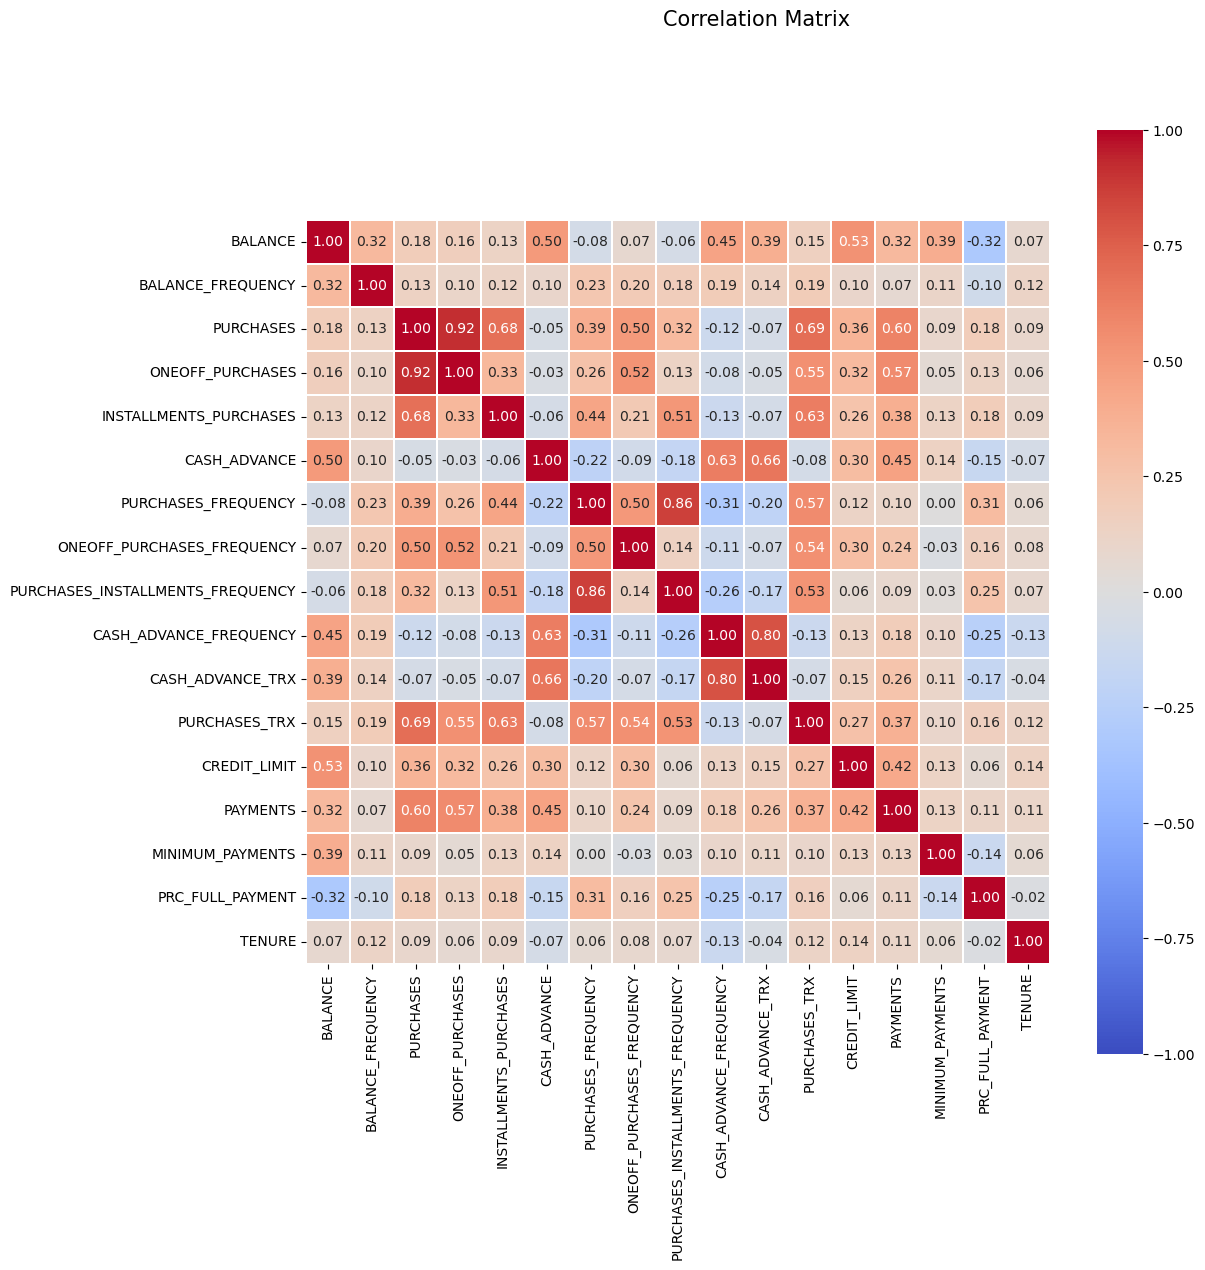

In [11]:
# display the correlation matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 12))
plt.suptitle('Correlation Matrix', fontsize=15)

sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.1, vmax=1.0, vmin=-1.0, square=True)

plt.show()

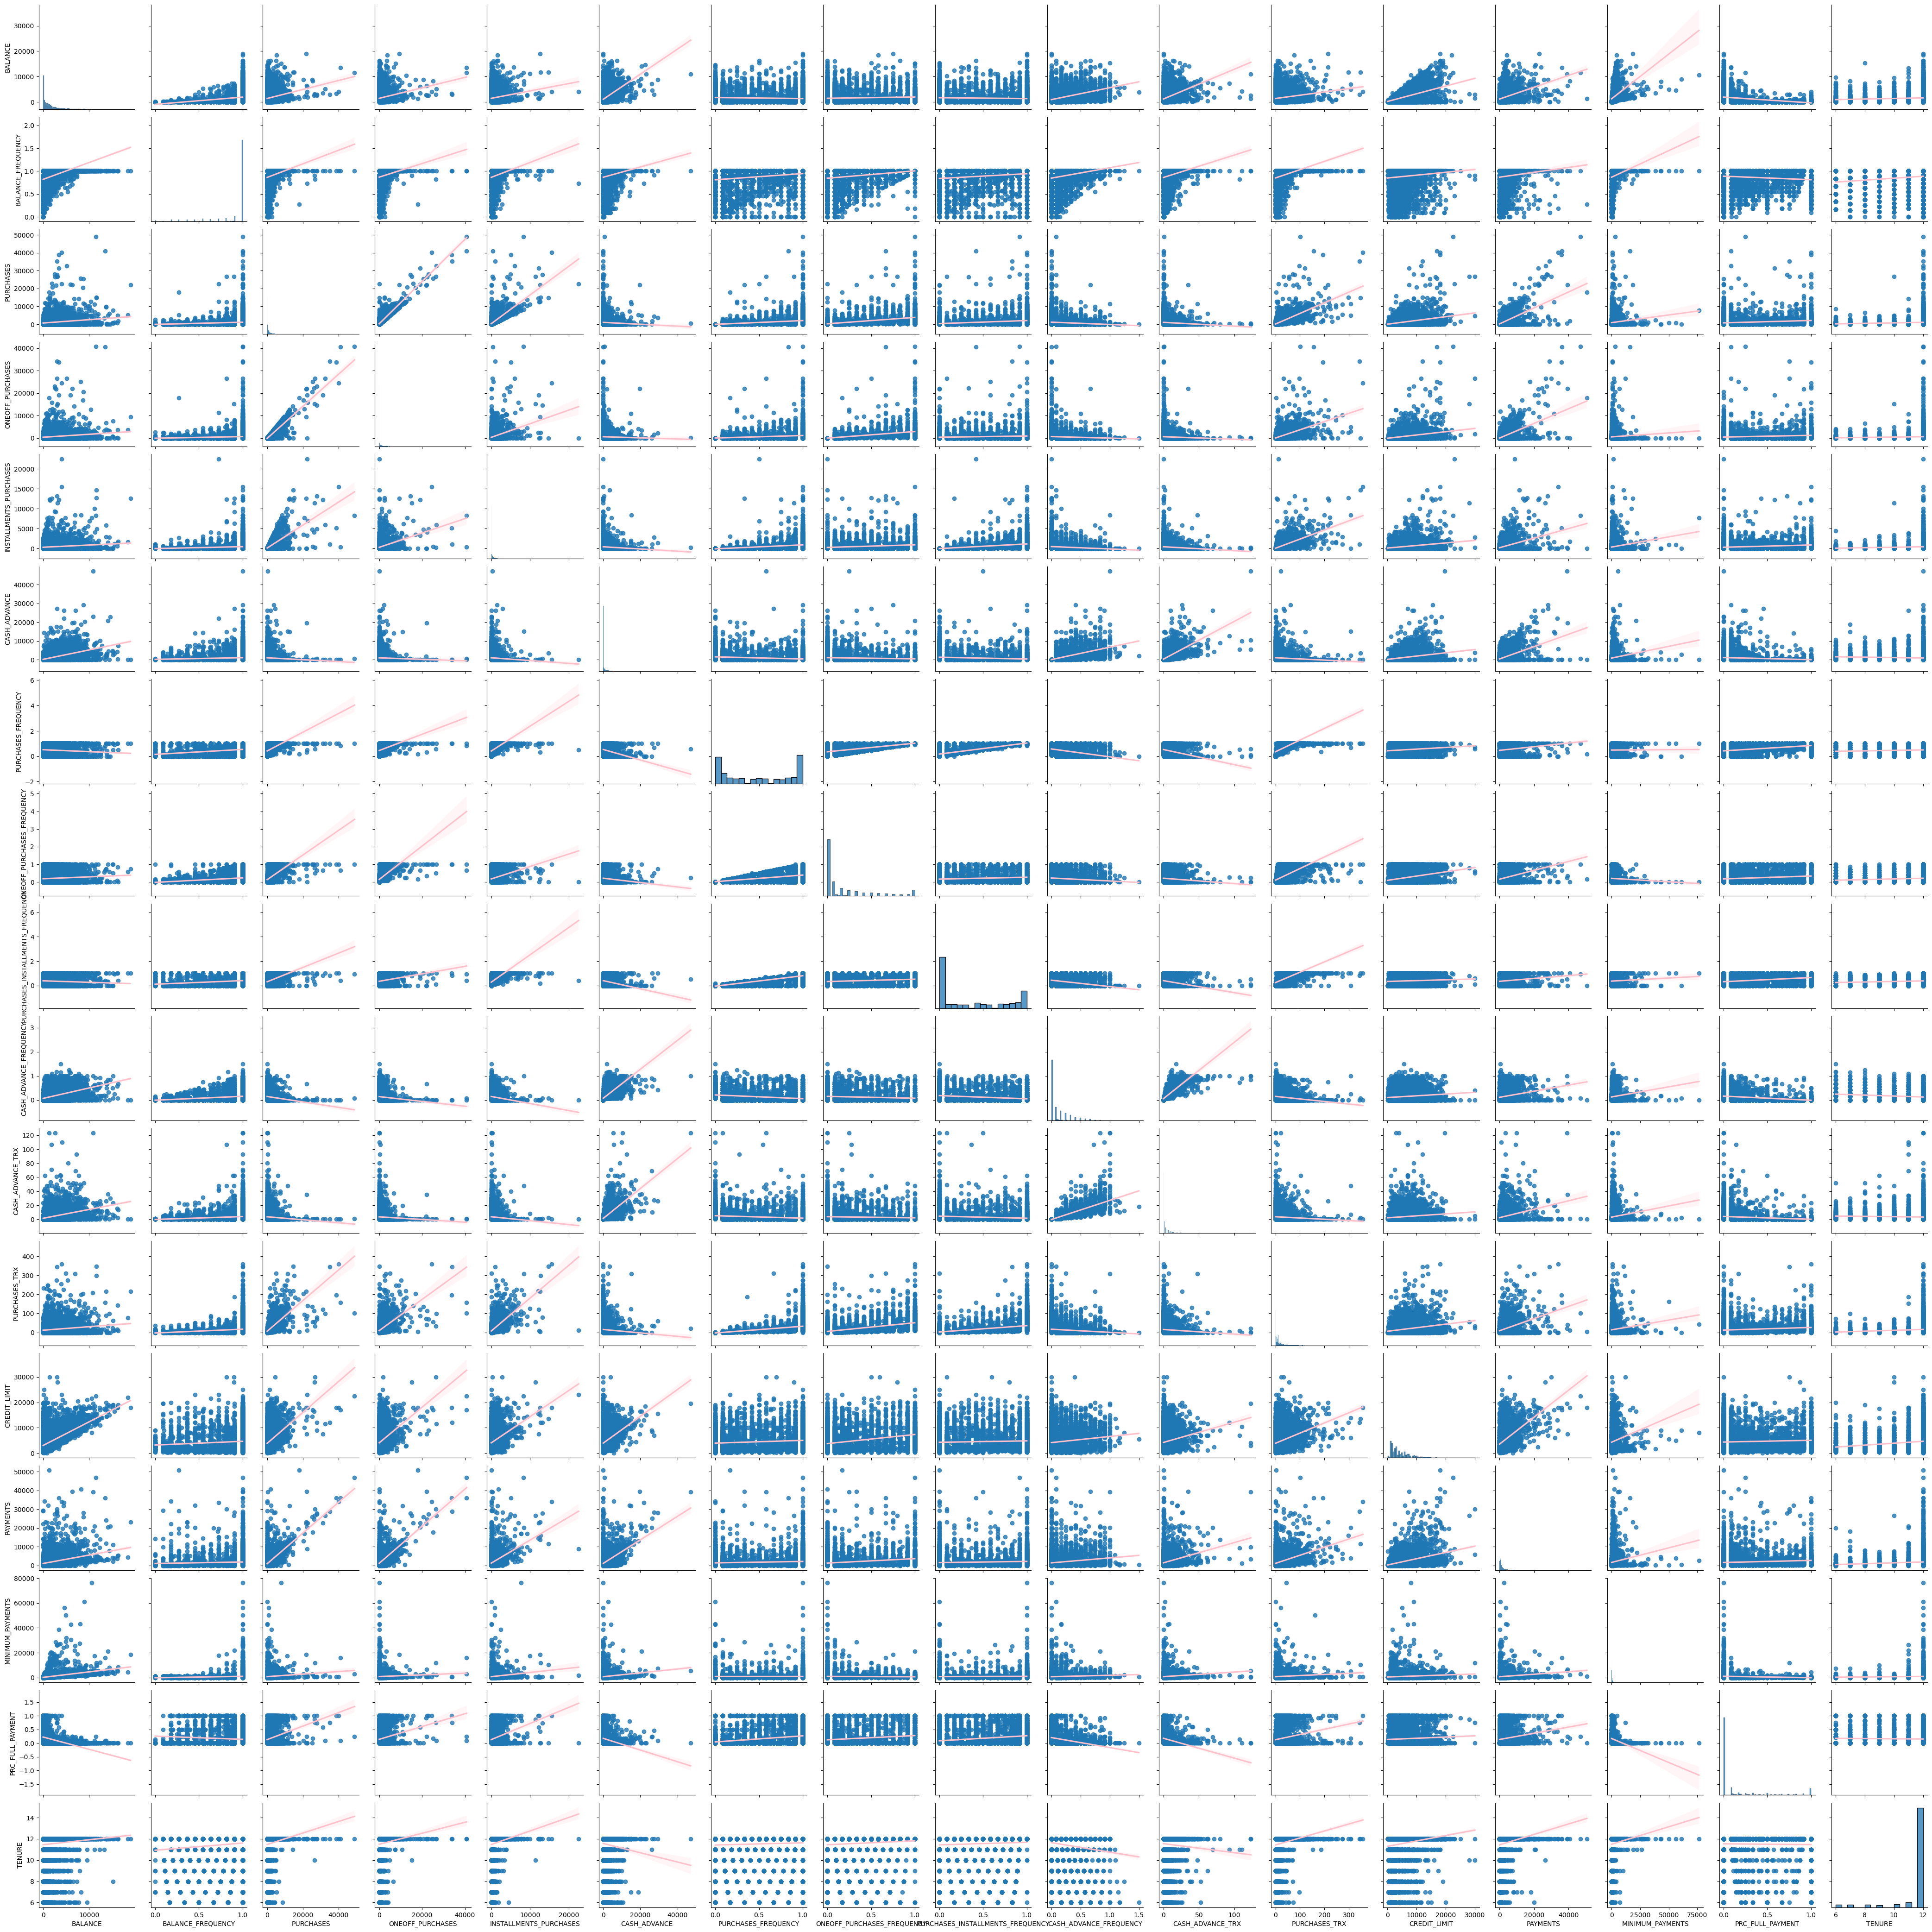

In [12]:
# display the pairplot using seaborn with a regression line
sns.pairplot(X, kind='reg', plot_kws={'line_kws':{'color':'pink'}})

**Observations**
1. The highest correlation exists between ONEOFF_PURCHASES and PURCHASES at 0.92; followed by 0.86 of PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY and by 0.80 of CASH_ADVANCE_TRX and CASH_ADVANCE FREQUENCY.
2. There is not a pair of features showing strong negative correlation.
3. Some groups of features are related from their definition. For group like CASH_ADVANCE, CASH_ADVANCE_TRX, and CASH_ADVANCE_FREQUENCY; INSTALLMENTS_PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY; ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY; their correlation are usually greater than 0.5.
4. In general, TENURE has low correlation with all other features. 
5. From the context as a credit card company, we may further examine the relationship between BALANCE, MINIMUM_PAYMENTS, PAYMENTS, CREDIT_LIMIT, CASH_ADVANCE, INSTALLMENTS_PURCHASES, 
ONEOFF_PURCHASES and PURCHASES. 
    * BALANCE has strong correlation with CASH_ADVANCE (0.50) and CREDIT_LIMIT (0.53); it means that entries with higher BALANCE, ususally comes with a higher CASH_ADVANCE and CREDIT_LIMIT.
    * MINIMUM_PAYMENTS does not have a strong correlation with other features except with BALANCE at 0.39.
    * PAYMENTS has strong correlation with PURCHASES (0.60) and ONEOFF_PURCHASES (0.57); it means that entries with higher PAYMENTS, ususally comes with a higher PURCHASES and ONEOFF_PURCHASES.
    * CREDIT_LIMIT only has a strong correlation with BALANCE (0.53)
    * CASH_ADVANCE only has a strong correlation with BALANCE (0.50)
    * INSTALLMENTS_PURCHASES only has a strong correlation with PURCHASES (0.68)
    * ONEOFF_PURCHASES has strong correlation with PURCHASES (0.92) and PAYMENTS (0.57); it means that entries with higher ONEOFF_PURCHASES, ususally comes with a higher PURCHASES and PAYMENTS.
    * PURCHASES has strong correlation with ONEOFF_PURCHASES (0.92), INSTALLMENTS_PURCHASES (0.68) and PAYMENTS (0.60); it means that entries with higher PURCHASES, ususally comes with a higher ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES and PAYMENTS.

# 2. Modeling

**a. Use *sklearn.preprocessing.MinMaxScaler* to scale the data. Print the header.**

In [13]:
# scale data
scaler = MinMaxScaler()

# put the scaled data to a pd DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# print the header
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


**b. Use *sklearn.cluster.AgglomerativeClustering* to cluster the data agglomeratively. Create at least 10 different models with different choices for hyperparameters: *n_clusters*, *metric*, *linkage*, and *distance_threshold*. Calculate the silhouette score for each and tabulate the results.**

Before performing agglomerative clustering, we can perform the elbow method to help evaluate the appropriate number of clusters.

In [41]:
# setup for KMeans to perform elbow method
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 100,
   }

# setup a list for the SSE values
sse = []

# run the KMeans algorithm for k = 1 to 10 and record the SSE value
for k in range(1, 10):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(df_scaled)
   sse.append(kmeans.inertia_)

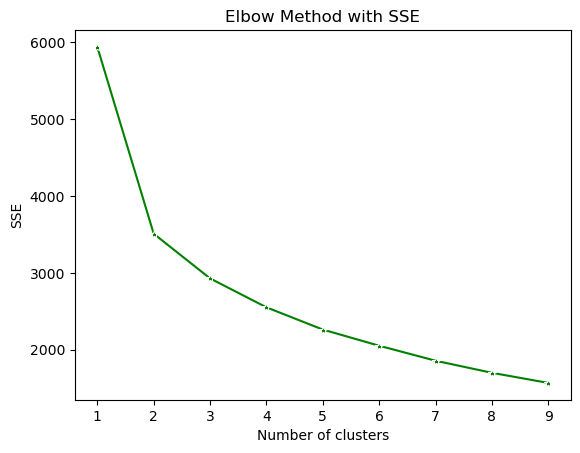

In [42]:
# plot the elbow method
sns.lineplot(x=range(1, 10), y=sse, marker='*', color='green')

plt.title('Elbow Method with SSE')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

plt.show()

In [43]:
# use the KneeLocator to find the elbow point
kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")

kl.elbow

3

Using the elbow method, we should try with 3 clusters. From the visualization, we may also try with 4 clusters.

In [17]:
# setup the different choices for hyperparameters
# n_clusters: int or None, default=2 | The number of clusters to find. 
# metric: metric, str or callable, default=None | Metric used to compute the linkage. 
# Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If set to None then “euclidean” is used. 
# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’ | Which linkage criterion to use.
# distance_threshold: float, default=None | The linkage distance threshold above which, clusters will not be merged.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

agg_parameter = {
    'agg_model_01': [None, 'euclidean', 'ward', 22],
    'agg_model_02': [None, 'euclidean', 'complete', 2.5],
    'agg_model_03': [3, 'euclidean', 'ward', None],
    'agg_model_04': [4, 'euclidean', 'ward', None],
    'agg_model_05': [3, 'euclidean', 'complete', None],
    'agg_model_06': [4, 'euclidean', 'complete', None],
    'agg_model_07': [4, 'manhattan', 'complete', None],
    'agg_model_08': [3, 'cosine', 'single', None],
    'agg_model_09': [4, 'l1', 'complete', None],
    'agg_model_10': [4, 'l2', 'complete', None]}

In [18]:
# run the AgglomerativeClustering algorithm for each hyperparameter and record the silhouette score
for k in agg_parameter:
    agg_clusterer = AgglomerativeClustering(n_clusters=agg_parameter[k][0],
                                        metric=agg_parameter[k][1],
                                        linkage=agg_parameter[k][2], 
                                        distance_threshold=agg_parameter[k][3]).fit(df_scaled)
    agg_cluster_labels = agg_clusterer.labels_
    agg_parameter[k].append(silhouette_score(df_scaled, agg_cluster_labels))

In [19]:
# print out the result in a table
agg_t = pt.PrettyTable(['Model', 'n_clusters', 'metric', 'linkage', 'distance_threshold', 'silhouette_score'])
for k in agg_parameter:
    agg_t.add_row([k, 
                   agg_parameter[k][0], 
                   agg_parameter[k][1], 
                   agg_parameter[k][2], 
                   agg_parameter[k][3], 
                   agg_parameter[k][4]])
print(agg_t)

+--------------+------------+-----------+----------+--------------------+---------------------+
|    Model     | n_clusters |   metric  | linkage  | distance_threshold |   silhouette_score  |
+--------------+------------+-----------+----------+--------------------+---------------------+
| agg_model_01 |    None    | euclidean |   ward   |         22         |  0.2546893376571295 |
| agg_model_02 |    None    | euclidean | complete |        2.5         | 0.27954068437881485 |
| agg_model_03 |     3      | euclidean |   ward   |        None        |  0.3336350894872987 |
| agg_model_04 |     4      | euclidean |   ward   |        None        |  0.2546893376571295 |
| agg_model_05 |     3      | euclidean | complete |        None        |  0.2802040380893061 |
| agg_model_06 |     4      | euclidean | complete |        None        | 0.27954068437881485 |
| agg_model_07 |     4      | manhattan | complete |        None        | 0.21262875078635443 |
| agg_model_08 |     3      |   cosine  

**c. Use *scipy.cluster.hierarchy.fcluster* to cluster the data divisively. Create at least 10 different models with different choices for hyperparameters: *t*, *criterion*, and *depth*. Calculate the silhouette score for each and tabulate the results.**

We may use a dendrogram repeatedly to help visualize the hierarchical clustering to determine the 'distance' for the model of different combination of 'method' and 'metric'.

In [20]:
# setup the different choices for hyperparameters for linkage
# method: str, optional | The linkage algorithm to use.
# metric: str or function, optional | The distance metric to use in the case that y is a collection of observation vectors; ignored otherwise.

linkage_parameter = {
    'linkage_model_01': ['ward', 'euclidean'],
    'linkage_model_02': ['complete', 'euclidean'],
    'linkage_model_03': ['average', 'euclidean'],
    'linkage_model_04': ['weighted', 'euclidean'],
    'linkage_model_05': ['average', 'dice'],
    'linkage_model_06': ['complete', 'cityblock'],
    'linkage_model_07': ['weighted', 'cityblock'],
    'linkage_model_08': ['complete', 'minkowski']
    }

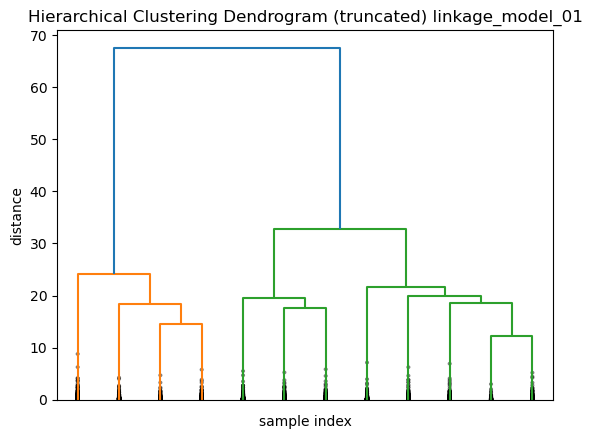

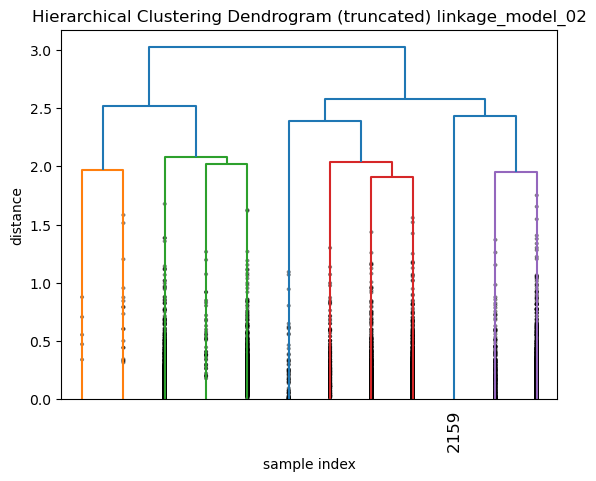

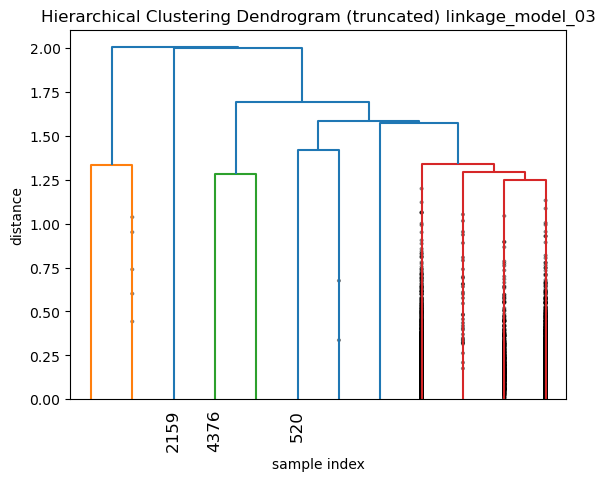

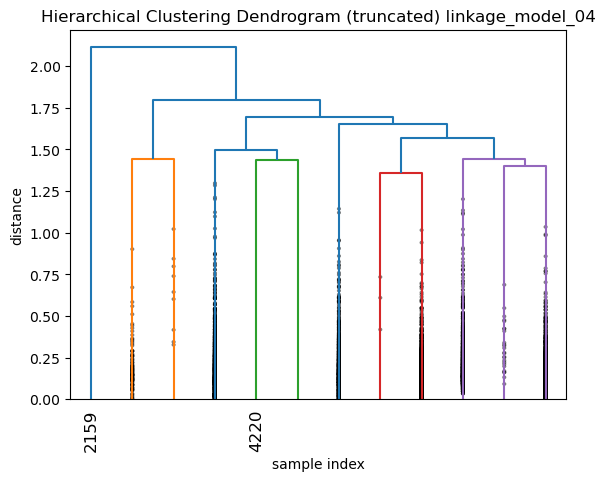

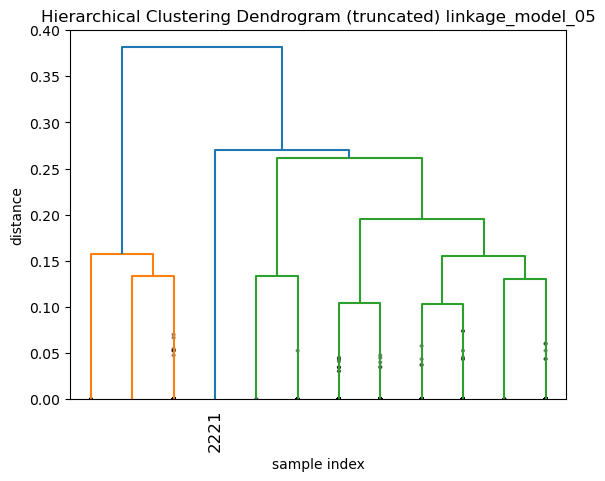

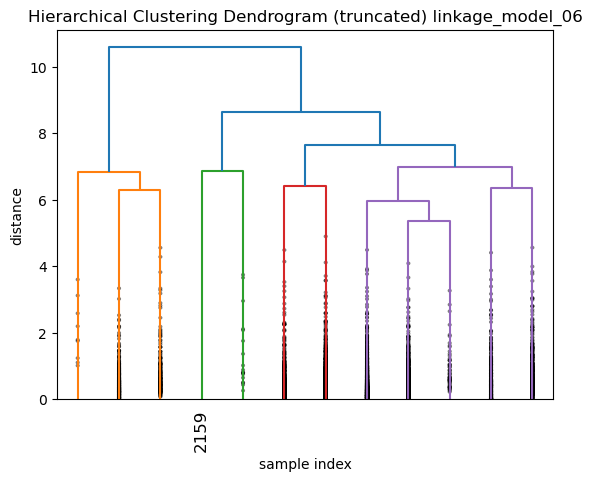

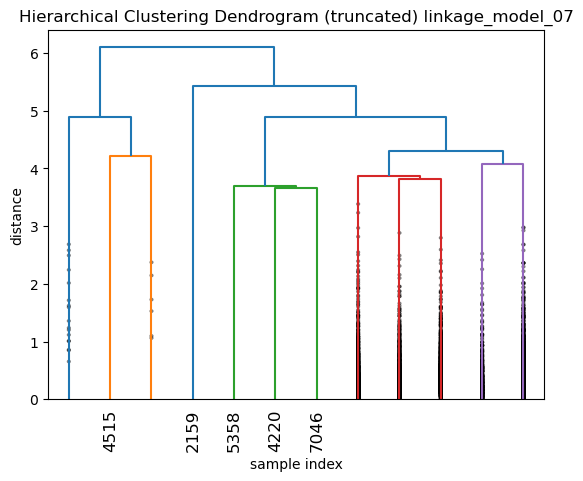

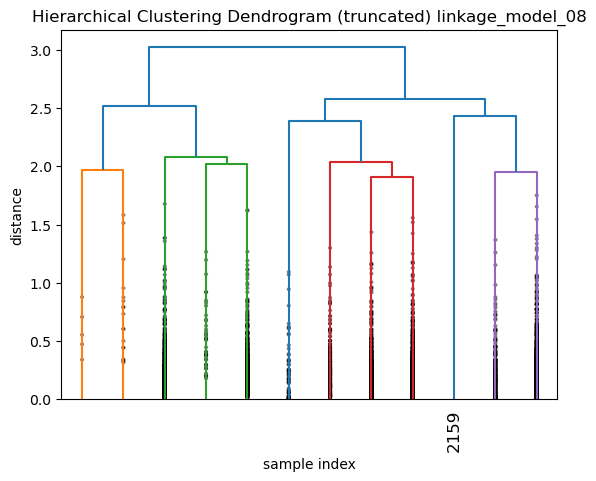

In [21]:
# plot a truncated dendrogram to visualize the distance to distingush the clusters
for k in linkage_parameter:
    plt.title('Hierarchical Clustering Dendrogram (truncated) ' + str(k))
    plt.xlabel('sample index')
    plt.ylabel('distance')

    dendrogram(
        linkage(df_scaled, method=linkage_parameter[k][0], metric=linkage_parameter[k][1]),
        truncate_mode='lastp',      # show only the last p merged clusters
        p=12,                       # show only the last 12 merged clusters
        show_leaf_counts=False,     # otherwise numbers in brackets are counts
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,       # to get a distribution impression in truncated branches
        )

    plt.show()

In [22]:
# setup the different choices for hyperparameters
div_parameter = {
   'div_model_01': ['ward', 'euclidean', 4, 'maxclust', None],
   'div_model_02': ['ward', 'euclidean', 15.5, 'inconsistent', 10],
   'div_model_03': ['ward', 'euclidean', 18, 'inconsistent', 20],
   'div_model_04': ['ward', 'euclidean', 22, 'distance', None],
   'div_model_05': ['complete', 'euclidean', 2, 'distance', None],
   'div_model_06': ['complete', 'euclidean', 12, 'inconsistent', 25],
   'div_model_07': ['complete', 'euclidean', 12, 'inconsistent', 30],
   'div_model_08': ['weighted', 'euclidean', 1.5, 'distance', None],
   'div_model_09': ['complete', 'minkowski', 2, 'distance', None],
   'div_model_10': ['complete', 'minkowski', 12, 'inconsistent', 25], 
   }

In [23]:
# run the fcluster algorithm for each hyperparameter and record the silhouette score
for k in div_parameter:
    clusterer_div = fcluster(linkage(df_scaled, 
                                     method=div_parameter[k][0], 
                                     metric=div_parameter[k][1]), 
                                     t=div_parameter[k][2], 
                                     criterion=div_parameter[k][3], 
                                     depth=div_parameter[k][4])
    cluster_labels = clusterer_div
    div_parameter[k].append(silhouette_score(df_scaled, cluster_labels))

In [24]:
# display the results in a table
t_div = pt.PrettyTable(['Model', 'method', 'metric', 't', 'criterion', 'depth', 'silhouette_score'])
for k in div_parameter:
    t_div.add_row([k, 
                   div_parameter[k][0], 
                   div_parameter[k][1], 
                   div_parameter[k][2], 
                   div_parameter[k][3], 
                   div_parameter[k][4], 
                   div_parameter[k][5]])
print(t_div)

+--------------+----------+-----------+------+--------------+-------+---------------------+
|    Model     |  method  |   metric  |  t   |  criterion   | depth |   silhouette_score  |
+--------------+----------+-----------+------+--------------+-------+---------------------+
| div_model_01 |   ward   | euclidean |  4   |   maxclust   |  None |  0.2546893376571295 |
| div_model_02 |   ward   | euclidean | 15.5 | inconsistent |   10  | 0.24411776814006222 |
| div_model_03 |   ward   | euclidean |  18  | inconsistent |   20  | 0.19119363678576914 |
| div_model_04 |   ward   | euclidean |  22  |   distance   |  None |  0.2546893376571295 |
| div_model_05 | complete | euclidean |  2   |   distance   |  None | 0.27254070574814004 |
| div_model_06 | complete | euclidean |  12  | inconsistent |   25  |  0.2801826928700867 |
| div_model_07 | complete | euclidean |  12  | inconsistent |   30  |  0.2801826928700867 |
| div_model_08 | weighted | euclidean | 1.5  |   distance   |  None |  0.2029870

**d. Select the best model for the use case and justify your choice in markdown.**

Using the silhouette scores as a criteria, agg_model_03 from agglomerative clustering is the best model, where n_clusters is 3, metric is euclidean and linkage is ward, with the silhouette score at 0.3336350894872987

In [25]:
# save the best model 
_best_model = AgglomerativeClustering(n_clusters=3,
                                    metric='euclidean',
                                    linkage='ward', 
                                    distance_threshold=None).fit(df_scaled)
_best_labels = _best_model.labels_

# 3. Conclusions

**a. Based on your analysis in step 1, choose a pair of columns and generate a scatter plot of the data. Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot.**

Based on the analysis in step 1, we should choose the pair from the features that have strong correlation with other distinguishable features. Therefore we should choose from BALANCE, PAYMENTS and PURCHASES. BALANCE is eliminated because it only has strong correlation with CASH_ADVANCE and CREDIT_LIMIT. As a result, we should use 'PAYMENTS' and 'PURCHASES'.

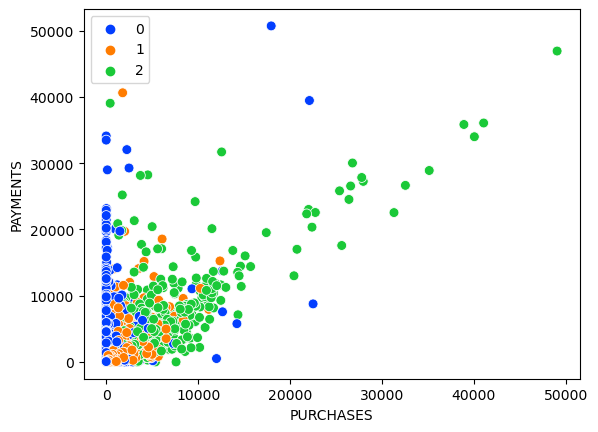

In [49]:
# visualize the clustering
sns.scatterplot(x=X['PURCHASES'], y=X['PAYMENTS'], data=X, s=50, hue=_best_labels, palette='bright')

plt.show()

**Observations:**
1. Cluster 0 can be categorized by smaller amount (0 to 5000) of purchases made from the account but small to medium amount (0 to 20000) of payment done by user
2. Cluster 1 can be categorized by small amount (1000 to 10000) of purchases made from the account but small amount (0 to 10000) of payment done by user
3. Cluster 2 can be categorized by a strong positive relation between PURCHASES and PAYMENTS where as the amount of purchases made from the account is getting larger, the amount of payment done by user is also getting larger. 

**b. Generate a histogram that shows the number of elements in each cluster. Use markdown to comment on the histogram.**

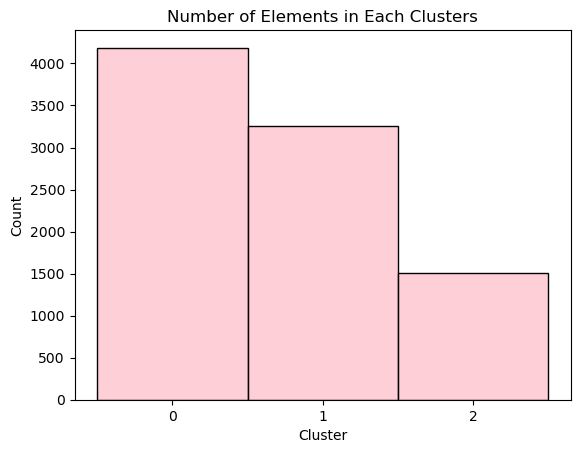

In [27]:
# generate a histogram to show the number of elements in each cluster
sns.histplot(data=_best_labels, discrete=True, bins=3, color='pink')

plt.title('Number of Elements in Each Clusters')
plt.xticks([0,1,2])
plt.xlabel('Cluster')

plt.show()

In [28]:
# count the number of elements in each cluster
cluster_count = pd.Series(_best_labels).value_counts()
cluster_count

0    4187
1    3256
2    1507
Name: count, dtype: int64

**Observations**
1. There are 3 clusters. 
2. There are the most elements in Cluster 0. The count is 4187. 
3. There are the lease elements in Cluster 2. The count is 1507.

**c. Create a separate dataframe for each cluster. Use *pandas.DataFrame.describe* to describe each cluster.**

In [29]:
# create a new DataFrame to store the cluster labels
hierar_df = df

# add the cluster labels to the DataFrame
hierar_df['hierar_cluster'] = _best_labels

# create a new DataFrame for each cluster
cluster_0 = hierar_df[hierar_df['hierar_cluster'] == 0]
cluster_1 = hierar_df[hierar_df['hierar_cluster'] == 1]
cluster_2 = hierar_df[hierar_df['hierar_cluster'] == 2]

In [30]:
# display the summary statistics for cluster 0
cluster_0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,hierar_cluster
count,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.0
mean,1708.819756,0.819407,258.517655,217.616513,40.980936,1404.320138,0.104922,0.071339,0.032633,0.192434,4.546214,1.963697,4119.787993,1502.700438,851.150916,0.068957,11.441844,0.0
std,2016.569959,0.282166,858.917686,750.605897,417.058391,2303.790770,0.134995,0.110441,0.081813,0.211615,7.706417,3.450852,3327.715670,2707.248790,2169.594476,0.198607,1.398295,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.055880,0.000000,6.000000,0.0
25%,210.931825,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,316.493347,187.583445,0.000000,12.000000,0.0
50%,1096.949604,1.000000,18.000000,0.000000,0.000000,455.053644,0.083333,0.000000,0.000000,0.142857,2.000000,1.000000,3000.000000,674.711298,418.773876,0.000000,12.000000,0.0
75%,2300.094409,1.000000,233.125000,171.990000,0.000000,1867.418312,0.166667,0.083333,0.000000,0.300000,6.000000,3.000000,6000.000000,1542.923529,864.206542,0.000000,12.000000,0.0
max,15258.225900,1.000000,22500.000000,22101.780000,22500.000000,26194.049540,1.000000,0.583333,1.000000,1.500000,123.000000,43.000000,23000.000000,50721.483360,61031.618600,1.000000,12.000000,0.0


In [31]:
# display the summary statistics for cluster 1
cluster_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,hierar_cluster
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.0
mean,1157.955517,0.905966,1007.011084,305.354128,702.291963,521.104304,0.817617,0.117947,0.751315,0.075471,1.773034,19.150491,3930.464674,1325.320676,895.752968,0.215402,11.435504,1.0
std,1836.687851,0.198522,1126.273015,656.439387,800.279736,1453.452958,0.211411,0.187432,0.247303,0.163818,4.827700,19.019129,3160.547763,1784.863105,2824.193576,0.321984,1.490003,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000,1.0
25%,61.197303,0.909091,303.757500,0.000000,238.877500,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,9.000000,1500.000000,362.882600,155.710313,0.000000,12.000000,1.0
50%,385.133125,1.000000,597.820000,0.000000,450.000000,0.000000,0.916667,0.000000,0.833333,0.000000,0.000000,12.000000,3000.000000,769.708420,211.928514,0.000000,12.000000,1.0
75%,1453.807662,1.000000,1289.575000,299.625000,877.712500,126.719499,1.000000,0.166667,1.000000,0.083333,1.000000,23.000000,5500.000000,1615.048595,817.037490,0.363636,12.000000,1.0
max,16304.889250,1.000000,12375.000000,6520.000000,12375.000000,18857.058470,1.000000,1.000000,1.000000,1.000000,71.000000,254.000000,21500.000000,40627.595240,76406.207520,1.000000,12.000000,1.0


In [32]:
# display the summary statistics for cluster 2
cluster_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,hierar_cluster
count,1507.000000,1507.00000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.0
mean,2041.750647,0.97604,3063.995853,2254.094950,810.089987,785.860934,0.854127,0.749346,0.450431,0.104901,2.832780,40.528865,6753.933160,3254.536575,832.321172,0.255923,11.903782,2.0
std,2551.243244,0.07852,4067.404289,3247.014425,1506.166819,2413.027337,0.181751,0.237754,0.388317,0.194335,7.194041,41.175438,4485.063153,4441.105659,1396.274298,0.368815,0.480046,0.0
min,0.000000,0.00000,8.400000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,5.000000,300.000000,0.000000,3.197940,0.000000,6.000000,2.0
25%,303.859867,1.00000,955.730000,716.820000,0.000000,0.000000,0.700000,0.583333,0.000000,0.000000,0.000000,14.000000,3000.000000,989.869135,186.372366,0.000000,12.000000,2.0
50%,1013.728552,1.00000,1903.660000,1366.300000,270.000000,0.000000,1.000000,0.818182,0.416667,0.000000,0.000000,27.000000,6000.000000,1903.279643,345.153590,0.000000,12.000000,2.0
75%,2902.890523,1.00000,3708.750000,2577.255000,989.965000,482.440130,1.000000,1.000000,0.898990,0.166667,2.000000,50.000000,9000.000000,3738.311896,960.751869,0.454545,12.000000,2.0
max,19043.138560,1.00000,49039.570000,40761.250000,15497.190000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,46930.598240,21235.065300,1.000000,12.000000,2.0


**d. Provide a written conclusion to describe each group of customers to the marketing strategy team.**

We can use the mean of each feature to describe each group of customers in general. Mean is the expectation, therefore it shows the expected behaviour of the clustered group. 

**Statistics of each group of customers**
1. Cluster 0: 
    * Highest in CASH_ADVANCE (1404), CASH_ADVANCE_FREQUENCY (0.19), CASH_ADVANCE_TRX (4.55)  
    * Lowest in BALANCE_FREQUENCY (0.82), PURCHASES (259), ONEOFF_PURCHASES (218), INSTALLMENTS_PURCHASES (41), PURCHASES_FREQUENCY (0.10), ONEOFF_PURCHASES_FREQUENCY (0.07),PURCHASES_INSTALLMENTS_FREQUENCY (0.03), PURCHASES_TRX (2), PRC_FULL_PAYMENT (0.07); 
2. Cluster 1: 
    * Highest in PURCHASES_INSTALLMENTS_FREQUENCY (0.75), MINIMUM_PAYMENTS (896)
    * Lowest in BALANCE (1158), CASH_ADVANCE (521), CASH_ADVANCE_FREQUENCY (0.08), CASH_ADVANCE_TRX (1.77), CREDIT_LIMIT (3930), PAYMENTS (1325)
3. Cluster 2: 
    * Highest in BALANCE (2042), BALANCE_FREQUENCY (0.98), PURCHASES (3064), ONEOFF_PURCHASES (2254), INSTALLMENTS_PURCHASES (810), PURCHASES_FREQUENCY (0.85), ONEOFF_PURCHASES_FREQUENCY (0.75), PURCHASES_TRX (41), CREDIT_LIMIT (6754), PAYMENTS (3255), PRC_FULL_PAYMENT (0.26)
    * Lowest in MINIMUM_PAYMENTS (832)

**Descriptions of each group of customers to the marketing strategy team**
1. Cluster 0: **Cash advance Group** This is the biggest group of users (47%). These users in general put cash advance (on average $1400) to the credit card. They do not do much purchases (on average $260), one-off purchases (on average $220) nor installment purchases (on average $40). 
2. Cluster 1: **Small Installment Group** These users in general use the credit card for small puschases in installment. They have a low balance (on average $1200) left in credit card for purchase and they do not do much in cash advance (on average $520). They are offered the lowest credit limit (on average $3930).
3. Cluster 2: **Frequent Big Spender Group** This is the smallest group of users (17%). These users in general frequently use the credit for all types of purchases (on average $3000), including one off purchases (on average $2300) and installments purchases (on average $800) and the relevant purchase amount is large. They maintains a high balance (on average $2000) in credit card for purchase. They are offered the highest credit limit (on average $6800).